In [26]:
import numpy as np
import pygimli as pg
import matplotlib.pyplot as plt
from pygimli.physics import ert
import pygimli.meshtools as mt
import pandas as pd


12/12/25 - 23:25:53 - pyGIMLi - INFO - Found 2 regions.
12/12/25 - 23:25:53 - pyGIMLi - INFO - Region with smallest marker set to background (marker=1)
12/12/25 - 23:25:53 - pyGIMLi - INFO - Found 2 regions.
12/12/25 - 23:25:53 - pyGIMLi - INFO - Region with smallest marker set to background (marker=1)
12/12/25 - 23:25:53 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/12/25 - 23:25:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/12/25 - 23:25:53 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1022 Cells: 1900 Boundaries: 1496


12/12/25 - 23:25:53 - pyGIMLi - INFO - Use median(data values)=71.96405940582315
12/12/25 - 23:25:54 - pyGIMLi - INFO - Found 2 regions.
12/12/25 - 23:25:54 - pyGIMLi - INFO - Region with smallest marker set to background (marker=1)
12/12/25 - 23:25:54 - pyGIMLi - INFO - Found 2 regions.
12/12/25 - 23:25:54 - pyGIMLi - INFO - Region with smallest marker set to background (marker=1)
12/12/25 - 23:25:54 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/12/25 - 23:25:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/12/25 - 23:25:54 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1022 Cells: 1900 Boundaries: 1496
12/12/25 - 23:25:54 - pyGIMLi - INFO - Use median(data values)=65.7456461224948


N(data['rhoa']=N(new_rhoa) ->>>>SVD...


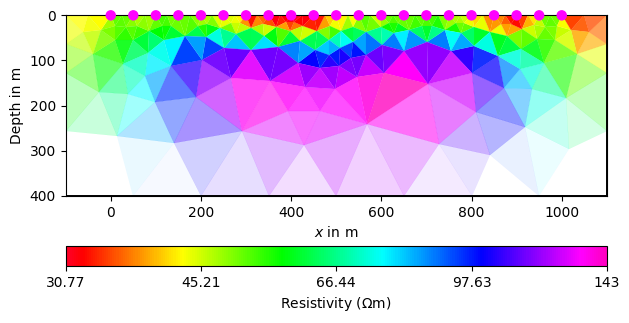

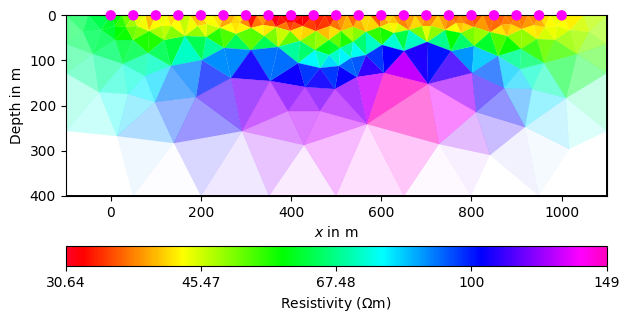

In [27]:
######################################################################
datafile='fwd_slm.dat'
data = pg.load(datafile)
mgr1 = ert.ERTManager(data)
inv1 = mgr1.invert()
mgr1.showResult(inv1, cMap="gist_rainbow")
chi2_1 = mgr1.inv.chi2()

######################################################################
new_rhoa=np.load('res_slm_reconstructed.npy')
if len(data['rhoa']) != len(new_rhoa):
    print(f"Original: {len(data['rhoa'])}, New: {len(new_rhoa)}")
    prrrrrrrrrrrrrrrrrrrr
    
else:
    print("N(data['rhoa']=N(new_rhoa) ->>>>SVD...")
    data['rhoa']=new_rhoa
    rhoa_vals=np.array(data['rhoa'])
    if np.isnan(rhoa_vals).any() or (rhoa_vals <= 0).any():              #remove invalid values
        mask=np.isnan(rhoa_vals) | (rhoa_vals<=0)
        data.remove(mask)


mgr2 = ert.ERTManager(data)
inv2 = mgr2.invert()
mgr2.showResult(inv2, cMap="gist_rainbow")
#######################################################################
chi2_2 = mgr2.inv.chi2()





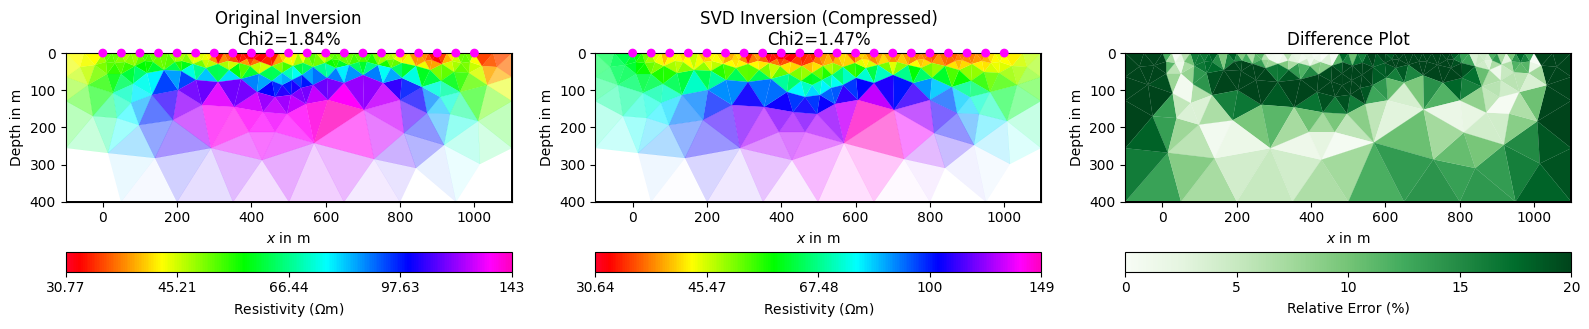

In [28]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(16, 6))
    
#original data
mgr1.showResult(ax=ax1, cMap="gist_rainbow")
ax1.set_title(f"Original Inversion\nChi2={chi2_1:.2f}%")
    
#SVD data
mgr2.showResult(ax=ax2, cMap="gist_rainbow")
ax2.set_title(f"SVD Inversion (Compressed)\nChi2={chi2_2:.2f}%")

ax3.set_title("Difference Plot")
res1=np.array(inv1)
res2=np.array(inv2)
diff_percent=np.abs((res1-res2)/res1*100)
pd = mgr1.paraDomain
pg.show(pd, diff_percent, ax=ax3, cMap="Greens", cMin=0, cMax=20, label="Relative Error (%)")

plt.tight_layout()
if 'slm' in datafile:
    plt.savefig("comparison_slm.png")
elif 'dd' in datafile:
    plt.savefig("comparison_dd.png")
plt.show()
